In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from PC_SL import *

In [5]:
df_asia = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\asia_10000.dat")
df_child = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\child.dat")
df_insurance = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\insurance.dat")
df_water = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\Water_1000.dat")
df_alarm = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\alarm_10000.dat")
df_barley = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat")
df_hailfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hailfinder.dat")
df_hepar2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\hepar2.dat")
df_andes = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\andes.dat")
df_link = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\link.dat")
df_pathfinder = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\pathfinder.dat")
df_munin2 = csv_format_discrete(r"C:\Users\User\Documents\GitHub\ML_FYP\dataset\munin2.dat")

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 971
**********
BN has score -508751.6734586516
**********
aar_mod<- -24026.105768303023
aks_m2<-udb -11990.213336785833
udb<-ntilg -18984.63109583052
aks_vgt<-aks_m2,udb -5321.93944764082
antplnt<-markgrm,saakern -350.10168346396676
markgrm<-jordinf,partigerm -1289.3314679199611
saakern<-saamng,tkvs -290.84074906414025
bgbyg<-slt22 -16441.12563381862
slt22<-aks_vgt,keraks,srtsize -560.9946318458242
dg25<-saatid -14998.822044349945
saatid<-dgv1059 -13903.164089500111
dgv1059<-aks_m2 -13949.684919452135
dgv5980<-bgbyg -12562.125586059905
exptgens<-nopt -8327.946858095682
nopt<-pesticid -11223.954830030736
forfrugt<-exptgens -15908.940024109135
frspdag<-saatid -13923.670698657079
jordinf<-frspdag -1432

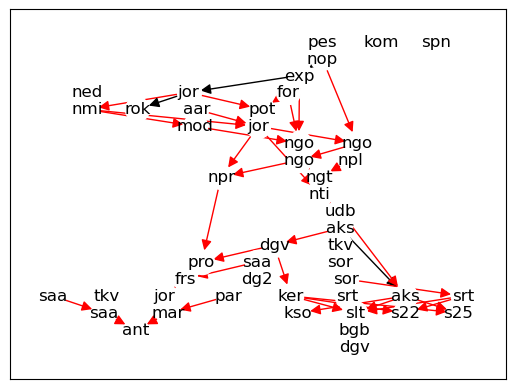

the time taken to learn the network is: 100.13977789878845 seconds
False Positive =  [['jordn', 'aar_mod'], ['s2225', 'aks_vgt'], ['aks_vgt', 'slt22'], ['antplnt', 'saakern'], ['dgv1059', 'protein'], ['jordn', 'ngodnn'], ['ksort', 'keraks'], ['mod_nmin', 'ngodnt'], ['nopt', 'ngodnn'], ['nprot', 'protein'], ['s2225', 'srtsize'], ['srtsize', 'slt22']]
False Negative =  [['aks_vgt', 'aks_m2'], ['saamng', 'aks_m2'], ['saatid', 'aks_m2'], ['dgv1059', 'rokap']]
the F-score is 0.8596491228070176
CPU times: total: 1min 41s
Wall time: 1min 40s


In [80]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_0 = Gobnilp()
k = PC_SL(df_barley, 1, 0.01)
for i in k:
    j_0.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_0.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_0))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 957
**********
BN has score -508751.6734586516
**********
aar_mod<- -24026.105768303023
aks_m2<-aks_vgt,udb -1824.562852449213
aks_vgt<-udb -15487.58993197744
udb<-ntilg -18984.63109583052
antplnt<-markgrm,saakern -350.10168346396676
markgrm<-jordinf,partigerm -1289.3314679199611
saakern<-saamng,tkvs -290.84074906414025
bgbyg<-slt22 -16441.12563381862
slt22<-aks_vgt,keraks,srtsize -560.9946318458242
dg25<-saatid -14998.822044349945
saatid<-dgv1059 -13903.164089500111
dgv1059<-aks_m2 -13949.684919452135
dgv5980<-bgbyg -12562.125586059905
exptgens<-jordtype -9329.333113128145
jordtype<-rokap -14579.02206606303
forfrugt<-exptgens -15908.940024109135
frspdag<-saatid -13923.670698657079
jordinf<-frspdag 

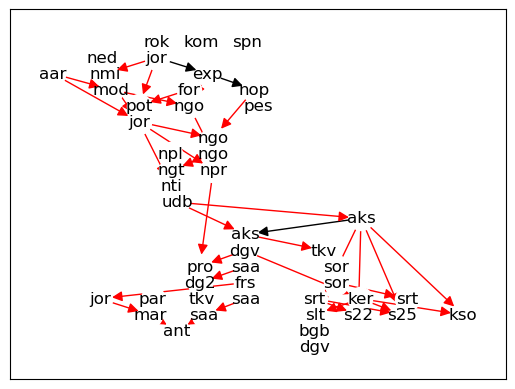

the time taken to learn the network is: 118.42608547210693 seconds
False Positive =  [['jordn', 'aar_mod'], ['dgv1059', 'aks_m2'], ['s2225', 'aks_vgt'], ['aks_vgt', 'slt22'], ['antplnt', 'saakern'], ['jordn', 'ngodnn'], ['ksort', 'keraks'], ['mod_nmin', 'ngodnt'], ['nopt', 'ngodnn'], ['nprot', 'protein'], ['s2225', 'srtsize'], ['srtsize', 'slt22']]
False Negative =  [['saamng', 'aks_m2'], ['saatid', 'aks_m2'], ['aks_vgt', 'udb'], ['dgv1059', 'rokap']]
the F-score is 0.8596491228070176
CPU times: total: 1min 59s
Wall time: 1min 58s


In [81]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_1 = Gobnilp()
k = PC_SL(df_barley, 1, 0.05)
for i in k:
    j_1.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_1.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_1))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 939
**********
BN has score -508751.6734586516
**********
aar_mod<- -24026.105768303023
aks_m2<-aks_vgt,udb -1824.562852449213
aks_vgt<-udb -15487.58993197744
udb<-ntilg -18984.63109583052
antplnt<-markgrm,saakern -350.10168346396676
markgrm<-jordinf,partigerm -1289.3314679199611
saakern<-saamng,tkvs -290.84074906414025
bgbyg<-slt22 -16441.12563381862
slt22<-aks_vgt,keraks,srtsize -560.9946318458242
dg25<-saatid -14998.822044349945
saatid<-dgv1059 -13903.164089500111
dgv1059<-aks_m2 -13949.684919452135
dgv5980<-bgbyg -12562.125586059905
exptgens<-nopt -8327.946858095682
nopt<- -11226.060906501312
forfrugt<-exptgens -15908.940024109135
frspdag<-saatid -13923.670698657079
jordinf<-frspdag -14322.14330

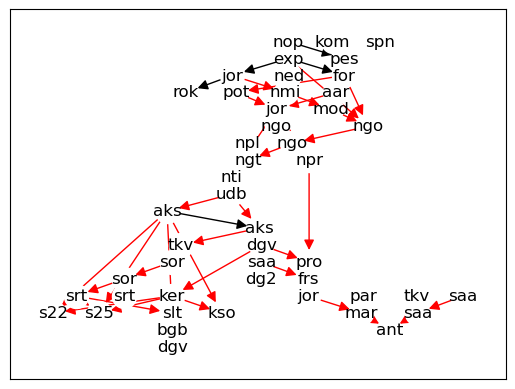

the time taken to learn the network is: 146.19245028495789 seconds
False Positive =  [['jordn', 'aar_mod'], ['dgv1059', 'aks_m2'], ['s2225', 'aks_vgt'], ['aks_vgt', 'slt22'], ['antplnt', 'saakern'], ['jordn', 'ngodnn'], ['ksort', 'keraks'], ['mod_nmin', 'ngodnt'], ['nopt', 'ngodnn'], ['s2225', 'srtsize'], ['srtsize', 'slt22']]
False Negative =  [['saamng', 'aks_m2'], ['saatid', 'aks_m2'], ['dgv1059', 'rokap'], ['jordn', 'nmin'], ['jordn', 'potnmin']]
the F-score is 0.8571428571428571
CPU times: total: 2min 25s
Wall time: 2min 26s


In [82]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_2 = Gobnilp()
k = PC_SL(df_barley, 1, 0.10)
for i in k:
    j_2.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_2.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_2))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 921
**********
BN has score -508751.6734586516
**********
aar_mod<- -24026.105768303023
aks_m2<-aks_vgt,udb -1824.562852449213
aks_vgt<-udb -15487.58993197744
udb<-ntilg -18984.63109583052
antplnt<-markgrm,saakern -350.10168346396676
markgrm<-jordinf,partigerm -1289.3314679199611
saakern<-saamng,tkvs -290.84074906414025
bgbyg<-slt22 -16441.12563381862
slt22<-aks_vgt,keraks,srtsize -560.9946318458242
dg25<-saatid -14998.822044349945
saatid<-dgv1059 -13903.164089500111
dgv1059<-aks_m2 -13949.684919452135
dgv5980<-bgbyg -12562.125586059905
exptgens<-nopt -8327.946858095682
nopt<- -11226.060906501312
forfrugt<-exptgens -15908.940024109135
frspdag<-saatid -13923.670698657079
jordinf<-frspdag -14322.14330

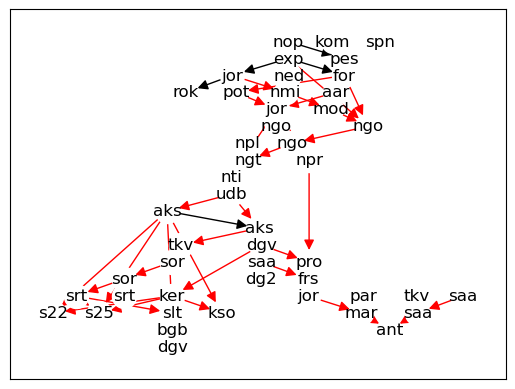

the time taken to learn the network is: 177.56883597373962 seconds
False Positive =  [['jordn', 'aar_mod'], ['dgv1059', 'aks_m2'], ['s2225', 'aks_vgt'], ['aks_vgt', 'slt22'], ['antplnt', 'saakern'], ['dgv1059', 'protein'], ['jordn', 'ngodnn'], ['ksort', 'keraks'], ['mod_nmin', 'ngodnt'], ['nopt', 'ngodnn'], ['nprot', 'protein'], ['s2225', 'srtsize'], ['srtsize', 'slt22']]
False Negative =  [['aks_vgt', 'aks_m2'], ['saamng', 'aks_m2'], ['saatid', 'aks_m2'], ['tkv', 'aks_m2'], ['aks_vgt', 'udb'], ['dgv1059', 'rokap'], ['jordn', 'nmin']]
the F-score is 0.8214285714285714
CPU times: total: 2min 55s
Wall time: 2min 57s


In [83]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_3 = Gobnilp()
k = PC_SL(df_barley, 1, 0.20)
for i in k:
    j_3.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_3.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_3))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
the number of restricted edges is : 904
**********
BN has score -508751.6734586516
**********
aar_mod<- -24026.105768303023
aks_m2<-aks_vgt,udb -1824.562852449213
aks_vgt<-udb -15487.58993197744
udb<-ntilg -18984.63109583052
antplnt<-markgrm,saakern -350.10168346396676
markgrm<-jordinf,partigerm -1289.3314679199611
saakern<-saamng,tkvs -290.84074906414025
bgbyg<-slt22 -16441.12563381862
slt22<-aks_vgt,keraks,srtsize -560.9946318458242
dg25<-saatid -14998.822044349945
saatid<-dgv1059 -13903.164089500111
dgv1059<-aks_m2 -13949.684919452135
dgv5980<-bgbyg -12562.125586059905
exptgens<- -11662.611791827017
forfrugt<-exptgens -15908.940024109135
frspdag<-saatid -13923.670698657079
jordinf<-frspdag -14322.143303364857
jordn<-aar_mod,nmin,po

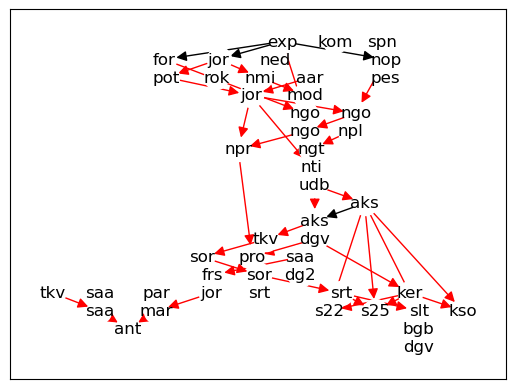

the time taken to learn the network is: 201.21148252487183 seconds
False Positive =  [['jordn', 'aar_mod'], ['dgv1059', 'aks_m2'], ['s2225', 'aks_vgt'], ['aks_vgt', 'slt22'], ['antplnt', 'saakern'], ['dgv1059', 'protein'], ['ksort', 'keraks'], ['mod_nmin', 'ngodnt'], ['nopt', 'ngodnn'], ['nprot', 'protein'], ['s2225', 'srtsize'], ['srtsize', 'slt22']]
False Negative =  [['aks_vgt', 'aks_m2'], ['saamng', 'aks_m2'], ['saatid', 'aks_m2'], ['aks_vgt', 'udb'], ['dgv1059', 'rokap'], ['potnmin', 'forfrugt'], ['jordtype', 'potnmin'], ['ntilg', 'udb']]
the F-score is 0.8181818181818182
CPU times: total: 3min 22s
Wall time: 3min 21s


In [84]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_4 = Gobnilp()
k = PC_SL(df_barley, 1, 0.30)
for i in k:
    j_4.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_4.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_4))

In [ ]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_5 = Gobnilp()
k = PC_SL(df_barley, 1, 0.40)

for i in k:
    j_5.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_5.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_5))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0


In [ ]:
%%time
'''
hybrid algorithm
'''

toc = time.time()
'''
restrict phase
'''
j_6 = Gobnilp()
k = PC_SL(df_barley, 1, 0.50)

for i in k:
    j_6.add_forbidden_adjacency((i[0], i[1]))
'''
score phase
'''
#score phase##
j_6.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')
print('the F-score is', F_score(j_6))

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -508657.25633338984
**********
aar_mod<- -24026.105768303023
aks_m2<-udb -11990.213336785833
udb<-ntilg -18984.63109583052
aks_vgt<-aks_m2,udb -5321.93944764082
antplnt<-markgrm,saakern -350.10168346396676
markgrm<-jordinf,partigerm -1289.3314679199611
saakern<-saamng,tkvs -290.84074906414025
bgbyg<-slt22 -16441.12563381862
slt22<-aks_vgt,keraks,srtsize -560.9946318458242
dg25<-saatid -14998.822044349945
saatid<-aks_m2 -15819.386910455381
dgv1059<-rokap,saatid -11947.487812400774
rokap<-jordtype -11467.389968806412
dgv5980<-bgbyg -12562.125586059905
exptgens<-forfrugt -11458.849481064142
forfrugt<- -16112.70233487201
frspdag<-saatid -13923.670698657079
jordinf<-frspdag -14322.143303364857
jordn<-aar_mod,nmin,po

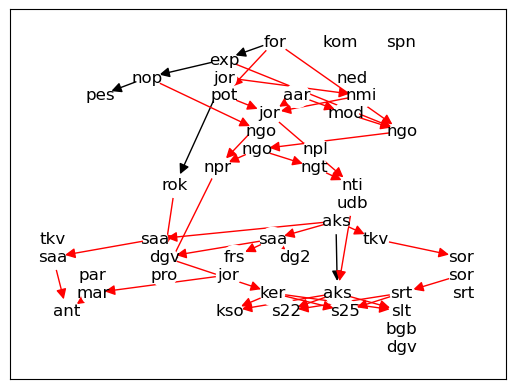

the time taken to learn the network is: 92.628502368927 seconds
CPU times: total: 2min 53s
Wall time: 1min 32s


In [78]:
%%time
toc = time.time()

'''
score-based algorithm
'''
T = Gobnilp()
#score phase##
T.learn(r'C:\Users\User\Documents\GitHub\ML_FYP\dataset\barley.dat')
tic = time.time()
print('the time taken to learn the network is:', tic - toc, 'seconds')

In [79]:
k = [j_0, j_1, j_2, j_3, j_4, j_5, j_6]
for i in k:
    print(F_score(i))

SyntaxError: invalid syntax (2336556348.py, line 3)

In [37]:
def F_score(u):
    #j_0#
    '''
    u = hybrid graph
    v = real graph
    '''
    u_frozenset = []
    for i in u.adjacency.items():
        if i[1].X >= 1:
            u_frozenset.append(i[0])
    hybrid = [list(x) for x in u_frozenset]
    ##
    
    T_frozenset = []
    for i in T.adjacency.items():
        if i[1].X >= 1:
            T_frozenset.append(i[0])
    real = [list(x) for x in T_frozenset]
    
    #Finding TP, FP, FN#
    TP = [x for x in hybrid if x in (y for y in real)]
    FP = [x for x in hybrid if x not in (y for y in real)]
    FN = [x for x in real if x not in (y for y in hybrid)]
    
    # F_score#
    F_score = (2 * len(TP)) / (2 * len(TP) + len(FP) + len(FN))
    print('False Positive = ' ,FP)
    print('False Negative = ' ,FN)
    return F_score

In [38]:
F_score(j_0)

False Positive =  [['LungParench', 'HypoxiaInO2']]
False Negative =  []


0.9795918367346939